<a href="https://colab.research.google.com/github/HossamElsrah/Credit-Card-Fraud-Detection/blob/main/Copy_of_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
dhanushnarayananr_credit_card_fraud_path = kagglehub.dataset_download('dhanushnarayananr/credit-card-fraud')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import classification_report , roc_auc_score , roc_curve as sk_roc_curve,accuracy_score , precision_recall_curve , confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Data Overview

In [ ]:
#read the data
data = pd.read_csv("/content/card_transdata.csv")
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
#describition
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


* There are Extreme Outliers for numrical Features

In [ ]:
#nulls
data.isna().sum()

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


In [ ]:
#duplicate
data.duplicated().sum()

0

* The Data don't Have any missing valios or any Dublicated

# Exploratory Data Analysis (EDA)

In this section, we will analyze the dataset and We will focus on:
- Distribution of numerical features.
- Analysis of categorical features.
- Detecting outliers.
- Target Distribition

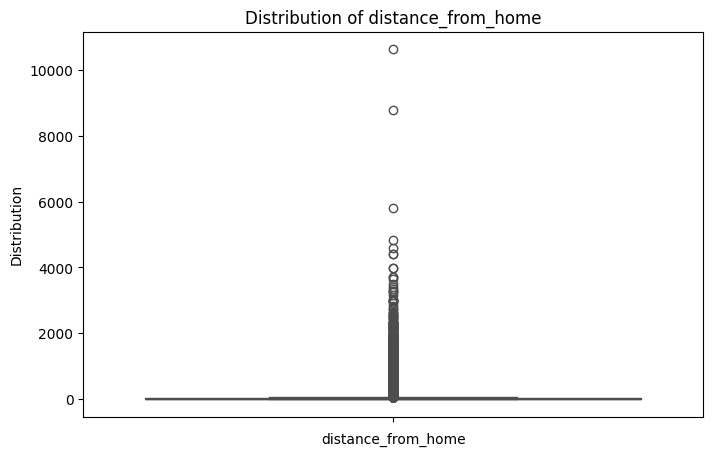

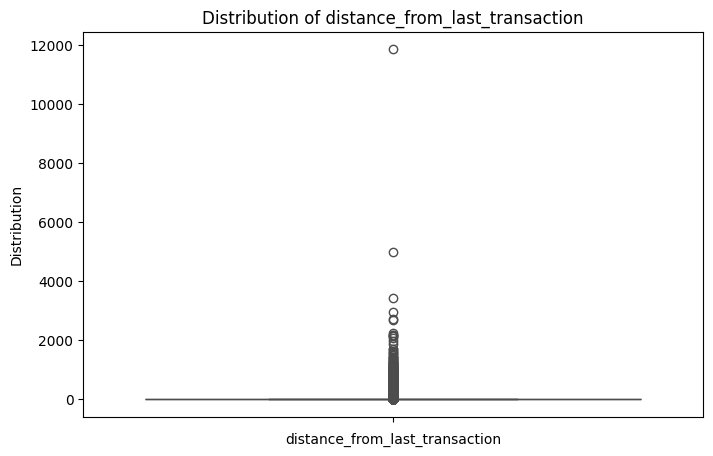

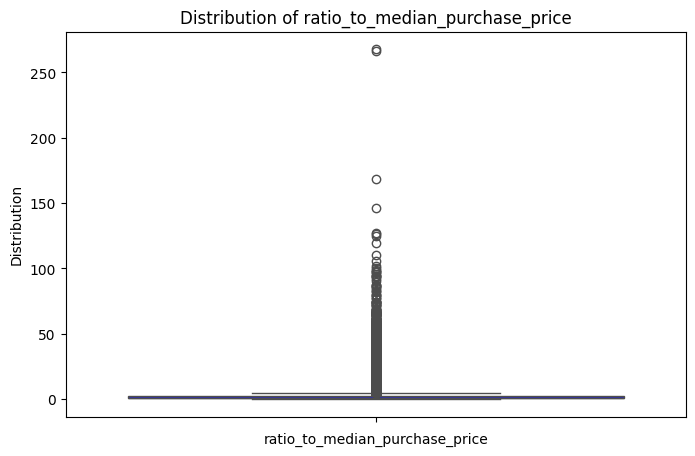

In [ ]:
#Distribition of Numeric Features
num_features = ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']

for col in num_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data[col], color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Distribution')
    plt.show()

* We don't need to remove too many outliers because they will affect the target, so we'll remove the very Extreme outliers

**Target distribution Before removing outliers**

In [ ]:
#Target Distribition
data["fraud"].value_counts(normalize=True).round(2)

,proportion
fraud,
0.0,0.91
1.0,0.09


In [ ]:
# List of numeric features with potential outliers
num_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

# Loop through each column and remove the rows with the largest 3 values
for col in num_features:
    # Find the indices of the largest 3 values
    largest_indices = data[col].nlargest(3).index

    # Drop these rows from the DataFrame
    data = data.drop(largest_indices)

# Reset the index after dropping rows
data = data.reset_index(drop=True)

**Check The Distribition Again**

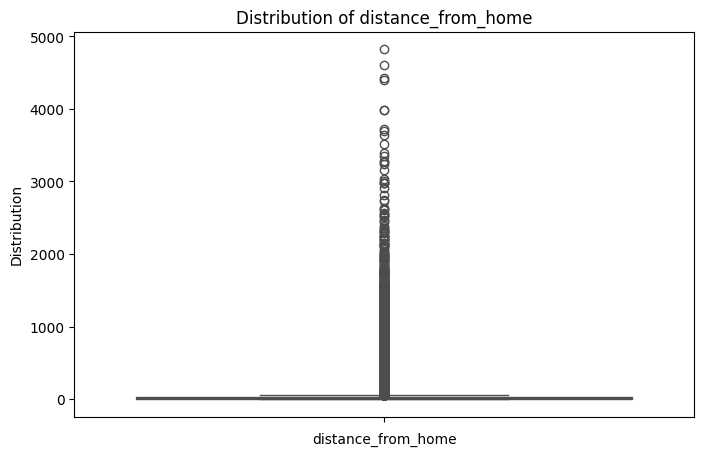

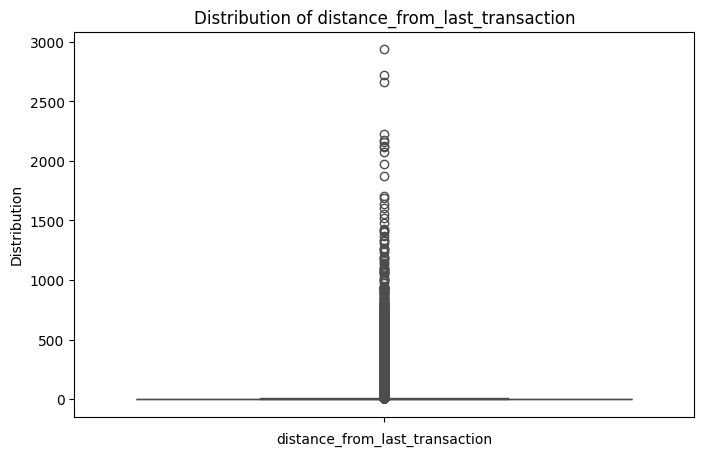

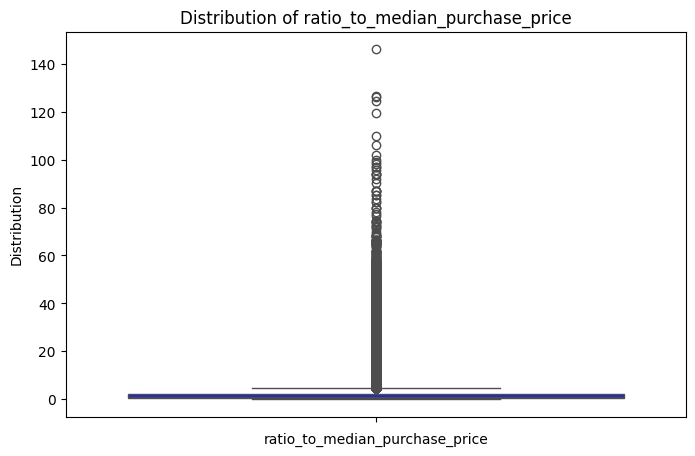

In [ ]:
#Distribition of Numeric Features
num_features = ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']

for col in num_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data[col], color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Distribution')
    plt.show()

**Target distribution After removing outliers**

In [ ]:
#Target Distribition
data["fraud"].value_counts(normalize=True).round(2)

,proportion
fraud,
0.0,0.91
1.0,0.09


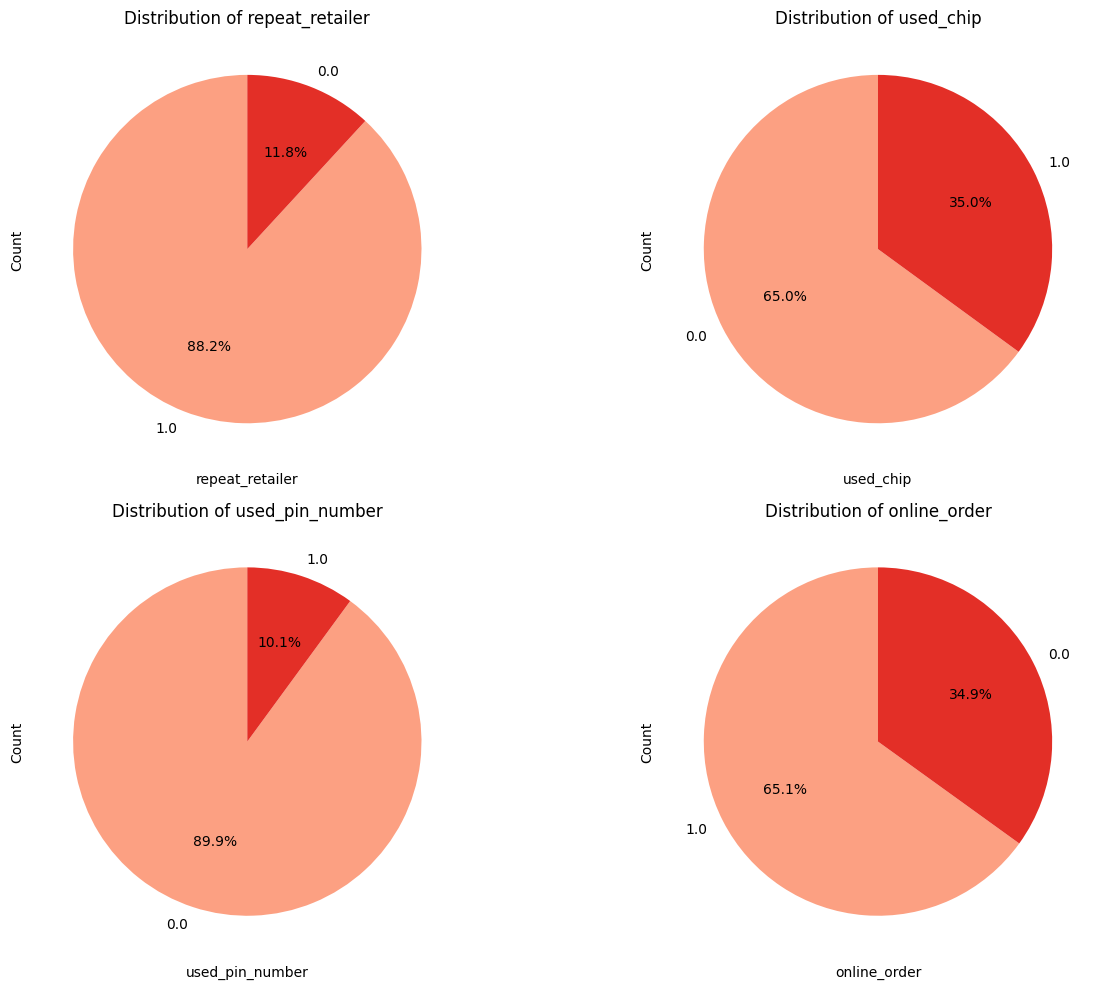

In [ ]:
#Analysis of categorical features
cat_features = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, col in enumerate(cat_features):
    value_counts = data[col].value_counts()
    value_counts.plot.pie(ax=axes[i],
                          autopct='%1.1f%%',
                          colors=sns.color_palette('Reds', n_colors=len(value_counts)),
                          startangle=90)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

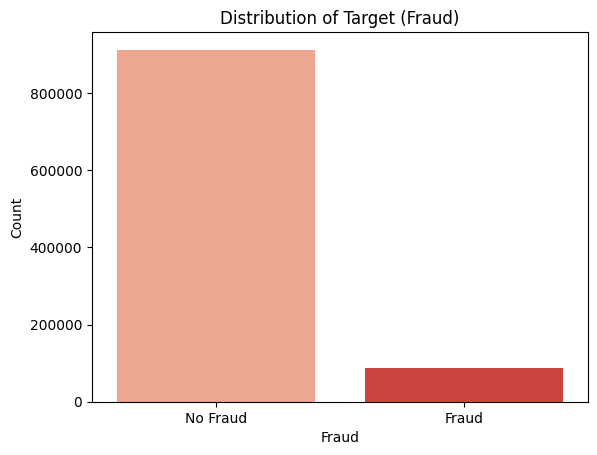

In [ ]:
#Target Distribition
sns.countplot(data=data, x="fraud", palette="Reds")
plt.title("Distribution of Target (Fraud)")
plt.xlabel("Fraud")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No Fraud", "Fraud"])
plt.show()

# Features Correlation with Target

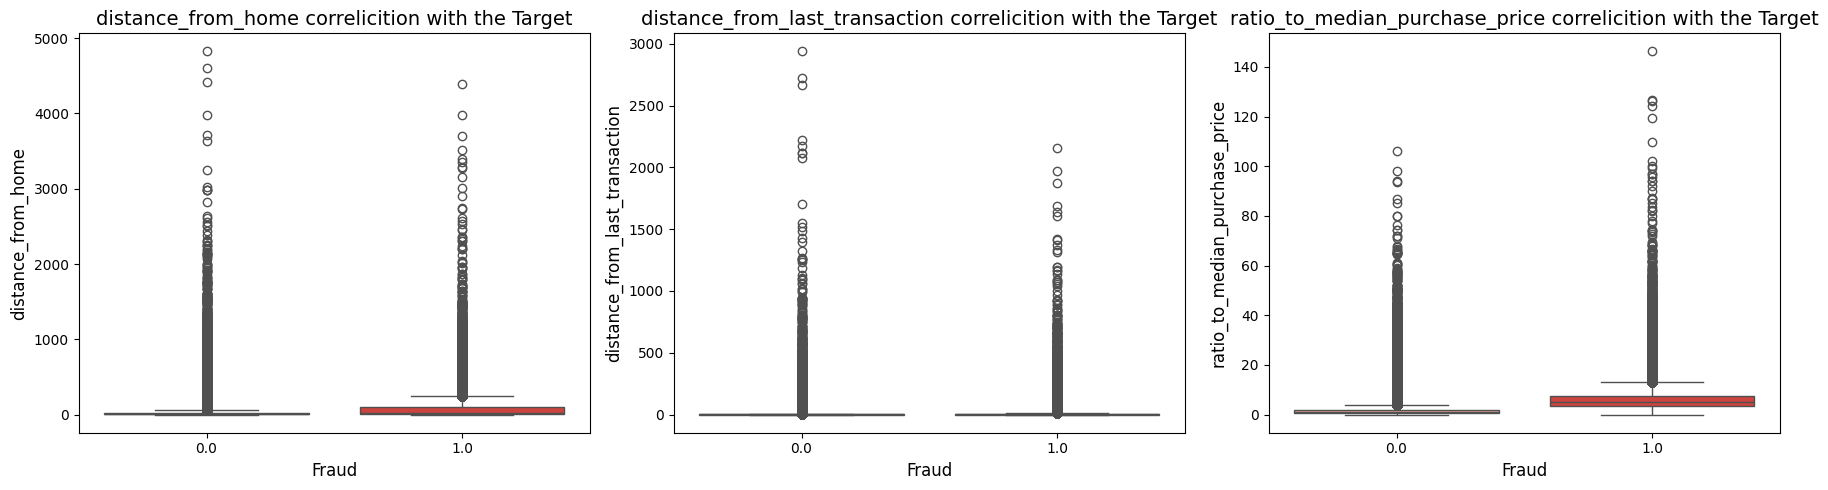

In [ ]:
#Numrical Features correlicition with the Target
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop through each numerical feature and plot the correlation with the target
for i, col in enumerate(num_features):
    sns.boxplot(data=data, x="fraud", y=col, ax=axes[i], palette="Reds")
    axes[i].set_title(f'{col} correlicition with the Target', fontsize=14)
    axes[i].set_xlabel('Fraud', fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

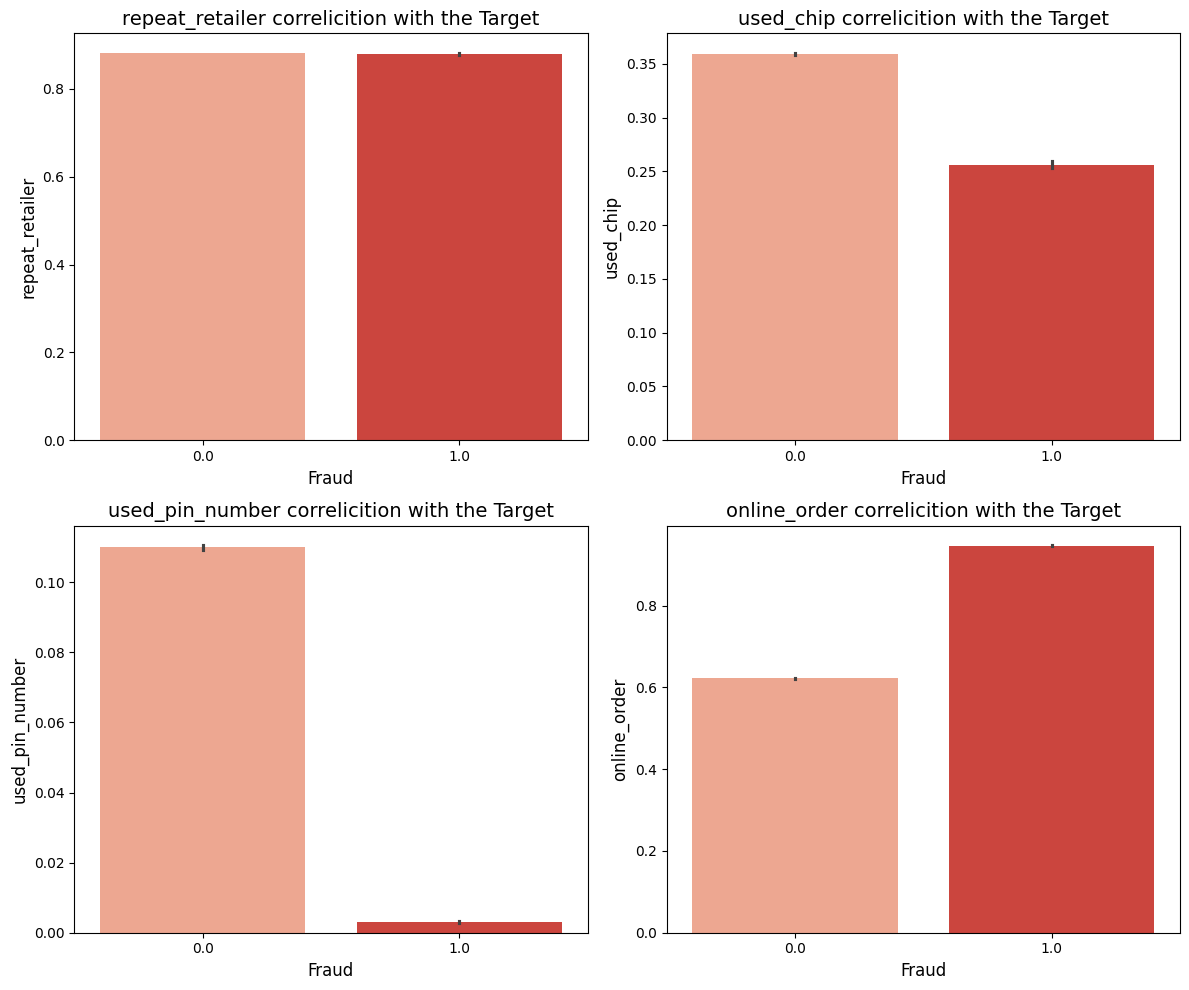

In [ ]:
#Categorical Features correlicition with the Target
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Loop through each Categorical feature and plot the correlation with the target
for i, col in enumerate(cat_features):
    sns.barplot(data=data, x="fraud", y=col, ax=axes[i], palette="Reds")
    axes[i].set_title(f'{col} correlicition with the Target', fontsize=14)
    axes[i].set_xlabel('Fraud', fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
data.corr().abs()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000658,0.001546,0.146853,0.000425,0.001535,0.001148,0.192182
distance_from_last_transaction,0.000658,1.000000,0.001145,0.000938,0.001152,0.000743,0.000181,0.107473
ratio_to_median_purchase_price,0.001546,0.001145,1.000000,0.001295,0.000779,0.001037,0.000191,0.467101
repeat_retailer,0.146853,0.000938,0.001295,1.000000,0.001340,0.000417,0.000535,0.001360
used_chip,0.000425,0.001152,0.000779,0.001340,1.000000,0.001393,0.000222,0.060970
used_pin_number,0.001535,0.000743,0.001037,0.000417,0.001393,1.000000,0.000292,0.100292
online_order,0.001148,0.000181,0.000191,0.000535,0.000222,0.000292,1.000000,0.191969
fraud,0.192182,0.107473,0.467101,0.001360,0.060970,0.100292,0.191969,1.000000


<Axes: >

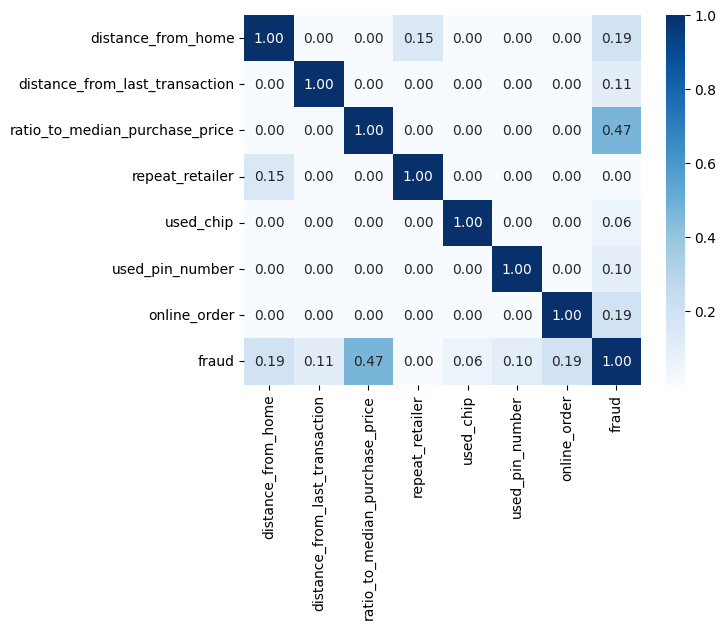

In [ ]:
sns.heatmap(data.corr().abs() ,annot=True , fmt=".2f" , cmap="Blues")

* All Features Have A correlition with The Target except for repeat_retailer

# Data Spiliting and Preprocessing

In [ ]:
#declare the featues and target
x = data.drop(columns=["fraud"])
y = data["fraud"]

In [ ]:
#split the data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#preprocessing
std = StandardScaler()
xtrain = std.fit_transform(xtrain)
xtest = std.transform(xtest)

# Model Building

1.  We Need To declare function to validate The Model
2.  We Need To declare function to Tunning The Model
3.  We Need To declare Function to Check Model Evaluation
4.  We Need To declare 2 Functions for (precision_recall_trade_off , roc_curve)

In [ ]:
#declare function to validata The Model
def validate(model,x,y,score,n):

    '''this function is to validate the model across multiple stratified splits'''

    validate = cross_val_score(model , x , y , scoring=score , cv=n)
    print('Cross Validation Scores: ',validate)
    print('Scores Mean: ',validate.mean())
    model.fit(x,y)
    return model

In [ ]:
#declare function to Tunning The Model
def tunning(model,x,y,params,score,n,n_iter=10):

    '''This function recieves a model then tune it using GridSearch
    then print the best parameters and return the best estimator'''

    grid = GridSearchCV(model,params,cv=n,scoring=score)
    grid.fit(x,y)
    best_model = grid.best_estimator_
    print("best Params : " , grid.best_params_)
    print("best Score : " , grid.best_score_)
    return best_model

In [ ]:
#declare Function to Check Model Evaluation
def model_evaluation(model,x,y,color,threshold):

    '''this function is to evaluate the model based on a given threshold
    1--> print the classification report     2--> display the confusion matrix'''

    #classification report
    y_pred_prob = model.predict_proba(x)[:, 1]
    y_pred = (y_pred_prob >= threshold).astype(int)
    print("Classification Report:")
    print(classification_report(y, y_pred, zero_division=0))

    #confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y, y_pred), annot=True , fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
#declare 2 Functions for (precision_recall_trade_off , roc_curve)

#precision_recall_trade_off
def precision_recall_trade_off(model,x,y):

    '''this function is to plot the precision-recall curve then
    printing the thresholds that achieves the highest recall'''

    y_pred_prob = model.predict_proba(x)[:, 1]
    precisions , recalls , thresholds = precision_recall_curve(y,y_pred_prob)
    df = pd.DataFrame({'Threshold':thresholds,'Precision':precisions[:-1],'Recall':recalls[:-1]})
    fig = px.line(df,x='Recall',y='Precision',
                  title='Precision-Recall Curve',
                  width=700,height=500,
                  hover_data=['Threshold'])
    fig.show()
    print(df[(df['Recall']>=0.9)].tail(10))

In [ ]:
#roc_curve
def roc_curve(model, x, y):

    '''This function plots the ROC-AUC curve and calculates the ROC-AUC score.'''

    y_pred_prob = model.predict_proba(x)[:, 1]
    fpr, tpr, thresholds = sk_roc_curve(y, y_pred_prob)
    df = pd.DataFrame({'Threshold': thresholds, 'FPR': fpr, 'TPR': tpr})
    fig = px.line(df, x='FPR', y='TPR', title='ROC Curve', width=700, height=500, hover_data=['Threshold'])
    fig.show()
    print('ROC-AUC Score: ',roc_auc_score(y,y_pred_prob))

* Before choosing the model, we will consider Recall as the main evaluation metric , because we need to ensure that all potential fraud cases are detected.

# Logistic Regression

In [ ]:
#validate
log = LogisticRegression(random_state=42)
log_reg = validate(log , xtrain , ytrain , "recall" , 10)
log_reg

Cross Validation Scores:  [0.60438458 0.60773639 0.59965611 0.59836653 0.59607394 0.60280843
 0.60467116 0.60495773 0.60266514 0.60853991]
Scores Mean:  0.6029859903082148


LogisticRegression(random_state=42)

In [ ]:
#Define the parameter grid for penalty and C
params = {'penalty': ['l1', 'l2', 'elasticnet'],
              'C': [0.01, 0.1, 1, 10],
              'solver': ['saga', 'liblinear']}

#Tunning The Model
best_log = tunning(log_reg , xtrain , ytrain , params , "recall" , 3)
best_log

best Params :  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
best Score :  0.6033729134122362


LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')

In [ ]:
#show precision-recall curve
precision_recall_trade_off(best_log , xtrain , ytrain)

In [ ]:
#Model Evaluation
model_evaluation(best_log , xtrain , ytrain , 'Blues' , 0.15)

In [ ]:
#show roc curve
roc_curve(best_log, xtrain, ytrain)

# KNN Classifier

In [ ]:
#validate
knn = KNeighborsClassifier(n_neighbors=5)
knn = validate(knn , xtrain , ytrain , "recall" , 10)
knn

In [ ]:
#show precision-recall curve
precision_recall_trade_off(knn , xtrain , ytrain)

In [ ]:
#Model Evaluation
model_evaluation(knn , xtrain , ytrain , 'Greens' , 0.5)

* check if the model drop in overfitting

In [ ]:
#Model Evaluation for testing
model_evaluation(knn , xtest , ytest , 'Greens' , 0.5)

In [ ]:
#show roc curve
roc_curve(knn, xtrain, ytrain)

In [ ]:
#show roc curve
roc_curve(knn, xtest, ytest)

# Decision Tree Classifier

In [ ]:
#validate
tree = DecisionTreeClassifier(random_state=42)
tree = validate(tree , xtrain , ytrain , "recall" , 10)
tree

Cross Validation Scores:  [1.         0.99985673 1.         0.99957014 1.         0.99971343
 0.99971343 1.         0.99971343 0.99985671]
Scores Mean:  0.9998423863485668


DecisionTreeClassifier(random_state=42)

In [ ]:
#show precision-recall curve
precision_recall_trade_off(tree , xtrain , ytrain)

   Threshold  Precision  Recall
0        0.0    0.08724     1.0
1        1.0    1.00000     1.0


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    730201
         1.0       1.00      1.00      1.00     69791

    accuracy                           1.00    799992
   macro avg       1.00      1.00      1.00    799992
weighted avg       1.00      1.00      1.00    799992



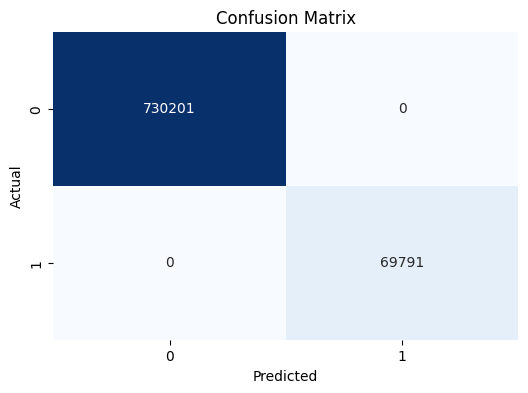

In [ ]:
#Model Evaluation
model_evaluation(tree , xtrain , ytrain , 'Reds' , 0.5)

* check if the model drop in overfitting

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182389
         1.0       1.00      1.00      1.00     17610

    accuracy                           1.00    199999
   macro avg       1.00      1.00      1.00    199999
weighted avg       1.00      1.00      1.00    199999



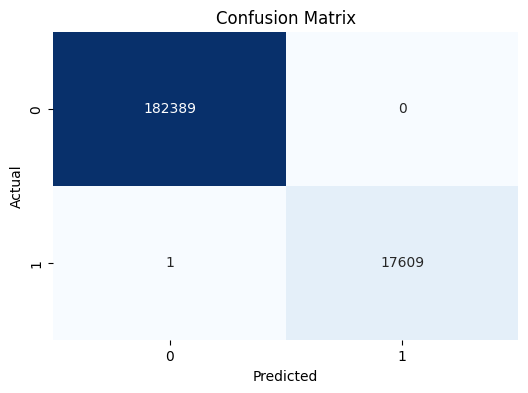

In [ ]:
#Model Evaluation for testing
model_evaluation(tree , xtest , ytest , 'Reds' , 0.5)

In [ ]:
#show roc curve
roc_curve(tree , xtrain, ytrain)

ROC-AUC Score:  1.0


In [ ]:
#show roc curve for testing
roc_curve(tree , xtest, ytest)

ROC-AUC Score:  0.9999716070414537


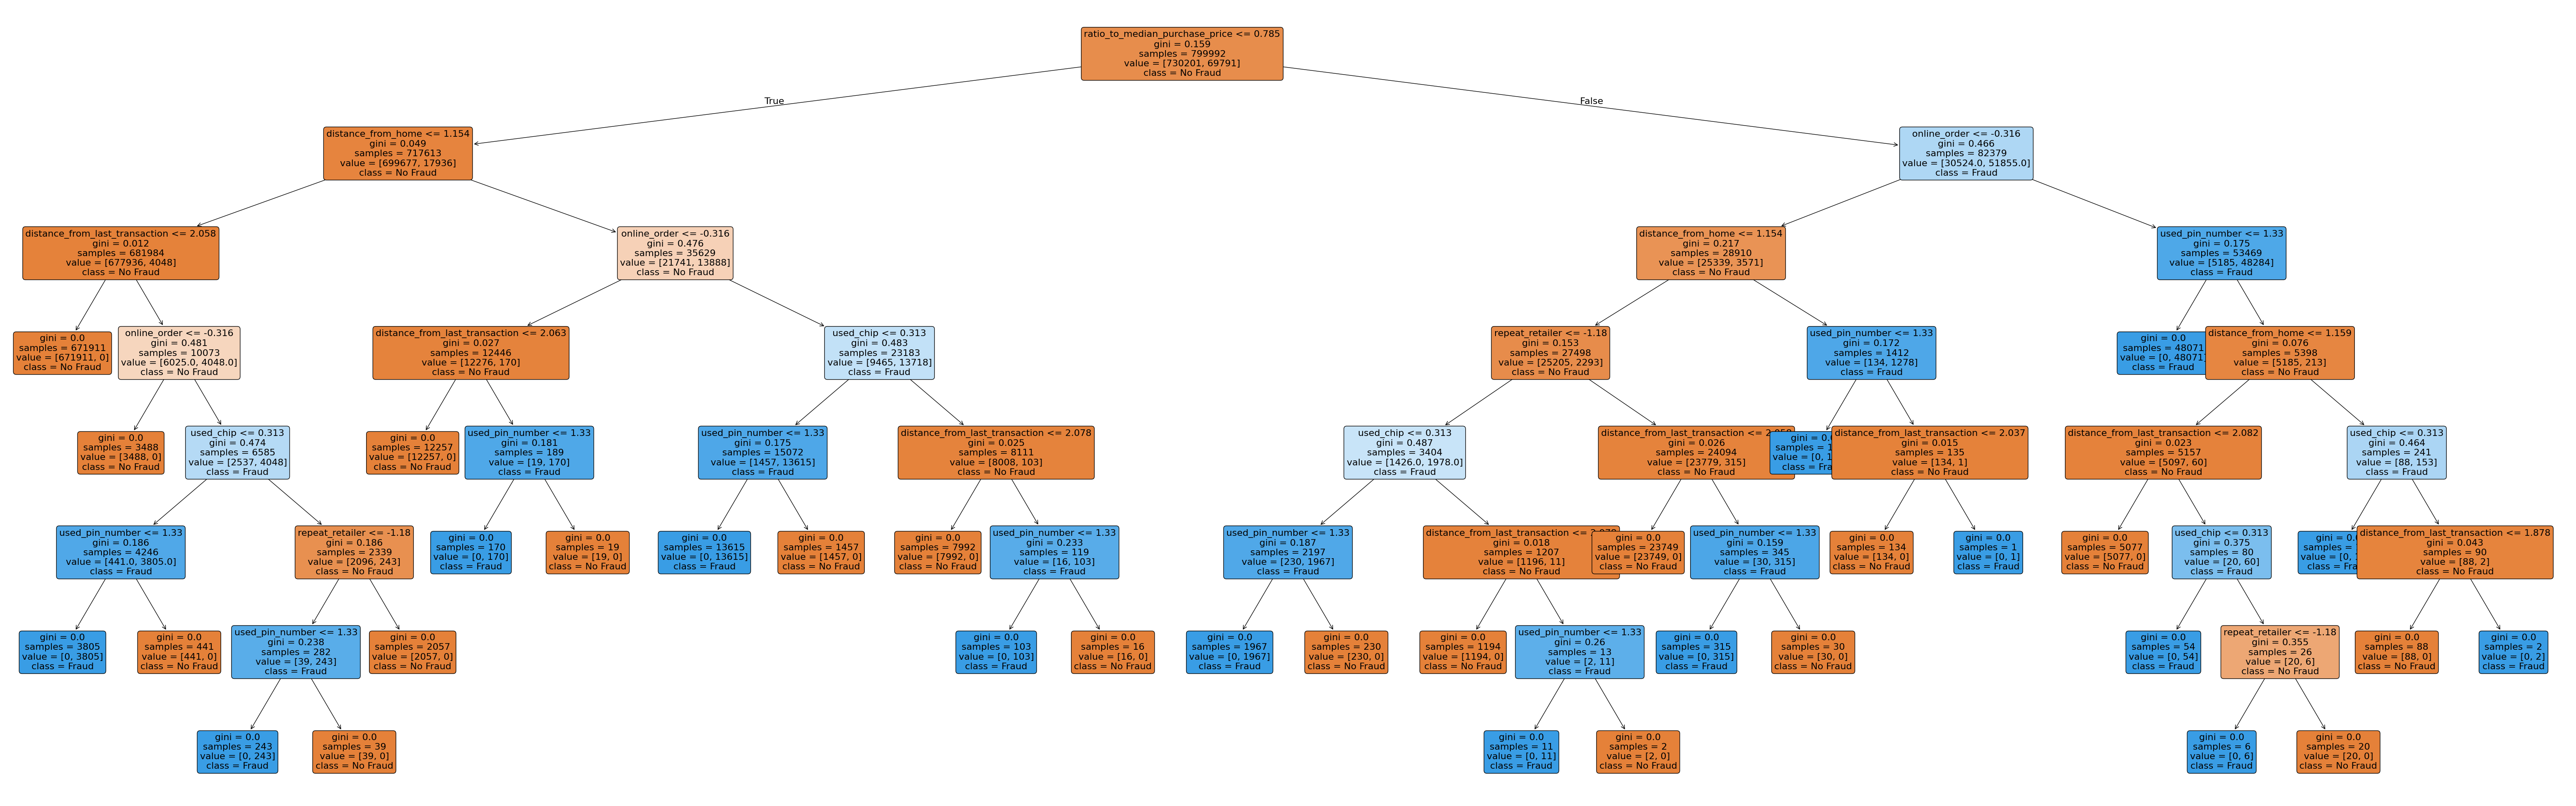

In [ ]:
plt.figure(figsize=(80,25))
plot_tree(tree,feature_names=x.columns,
          class_names=['No Fraud', "Fraud"],
          filled=True,rounded=True, fontsize=16);

# Random Forest Classifier

In [ ]:
#validate
rfc = RandomForestClassifier(random_state=42)
rfc = validate(rfc , xtrain , ytrain , "recall" , 10)
rfc

Cross Validation Scores:  [0.99985671 0.99985673 1.         0.99971343 0.99971343 0.99971343
 1.         1.         0.99985671 0.99971343]
Scores Mean:  0.9998423863485668


RandomForestClassifier(random_state=42)

In [ ]:
#show precision-recall curve
precision_recall_trade_off(rfc , xtrain , ytrain)

    Threshold  Precision    Recall
30       0.91        1.0  0.999556
31       0.92        1.0  0.999499
32       0.93        1.0  0.999384
33       0.94        1.0  0.999255
34       0.95        1.0  0.999040
35       0.96        1.0  0.998710
36       0.97        1.0  0.997908
37       0.98        1.0  0.996533
38       0.99        1.0  0.992248
39       1.00        1.0  0.965669


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    730201
         1.0       1.00      1.00      1.00     69791

    accuracy                           1.00    799992
   macro avg       1.00      1.00      1.00    799992
weighted avg       1.00      1.00      1.00    799992



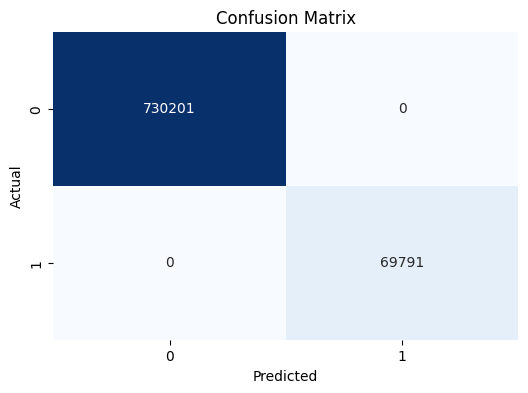

In [ ]:
#Model Evaluation
model_evaluation(rfc , xtrain , ytrain , 'Blacks' , 0.5)

* check if the model drop in overfitting

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182389
         1.0       1.00      1.00      1.00     17610

    accuracy                           1.00    199999
   macro avg       1.00      1.00      1.00    199999
weighted avg       1.00      1.00      1.00    199999



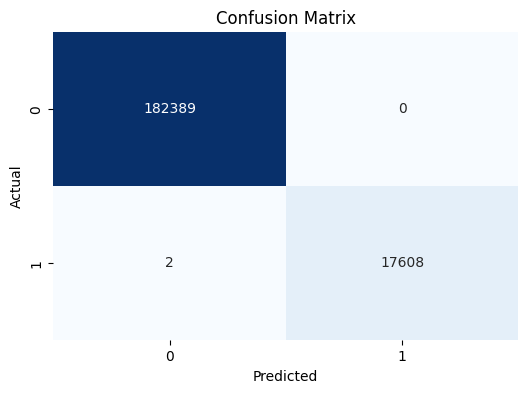

In [ ]:
#Model Evaluation for testing
model_evaluation(rfc , xtest , ytest , 'Blacks' , 0.5)

In [ ]:
#show roc curve
roc_curve(rfc , xtrain, ytrain)

ROC-AUC Score:  1.0


In [ ]:
#show roc curve for testing
roc_curve(rfc , xtest, ytest)

ROC-AUC Score:  0.999999993928771


# Conclusion
* All the features except for repeat_retailer have a moderate to strong correlation with the target.
* Logistic Regression showed underfitting and did not achieve good results.
* KNN achieved great results on both training and test sets with nearly (99% F1 score,99% Recall, 99% ROC-AUC score).
* Decision Tree and Random Forest achieved great results on both training and test sets with nearly (100% F1 score,100% Recall, 100% ROC-AUC score).